In [1]:
require 'image'
local pl = require('pl.import_into')()
t = {}
for i,f in ipairs(pl.dir.getallfiles('../train', '*.jpg')) do
    t[i] = { f, pl.path.basename(pl.path.dirname(f)) }
    xlua.progress(i)
end

In [2]:
print(#t)

3777	


In [3]:
print(t[1720][1])

../train/LAG/img_02042.jpg	


In [4]:
function vector_unique(input_table)
    local unique_elements = {} --tracking down all unique elements
    local output_table = {} --result table/vector

    for _, value in ipairs(input_table) do
        unique_elements[value] = true
    end

    for key, _ in pairs(unique_elements) do
        table.insert(output_table, key)
    end

    return output_table
end

In [5]:
nchannels=3
nrows=224
ncols=224
local labels={}
for i=1,#t do
    labels[i]=t[i][2]
    end
classes=vector_unique(labels)

In [6]:
print(classes)

{
  1 : DOL
  2 : OTHER
  3 : BET
  4 : LAG
  5 : ALB
  6 : YFT
  7 : SHARK
  8 : NoF
}


In [7]:
items={}
for i, v in ipairs(classes) do items[v]=i end
print(items)

{
  DOL : 1
  NoF : 8
  BET : 3
  LAG : 4
  ALB : 5
  YFT : 6
  SHARK : 7
  OTHER : 2
}


In [8]:
dataset=nil
datasets= torch.Tensor(#t,nchannels,nrows,ncols)
labels=torch.Tensor(#t)

In [9]:
datasets:size()

 3777
    3
  224
  224
[torch.LongStorage of size 4]



    3
  750
 1280
[torch.LongStorage of size 3]



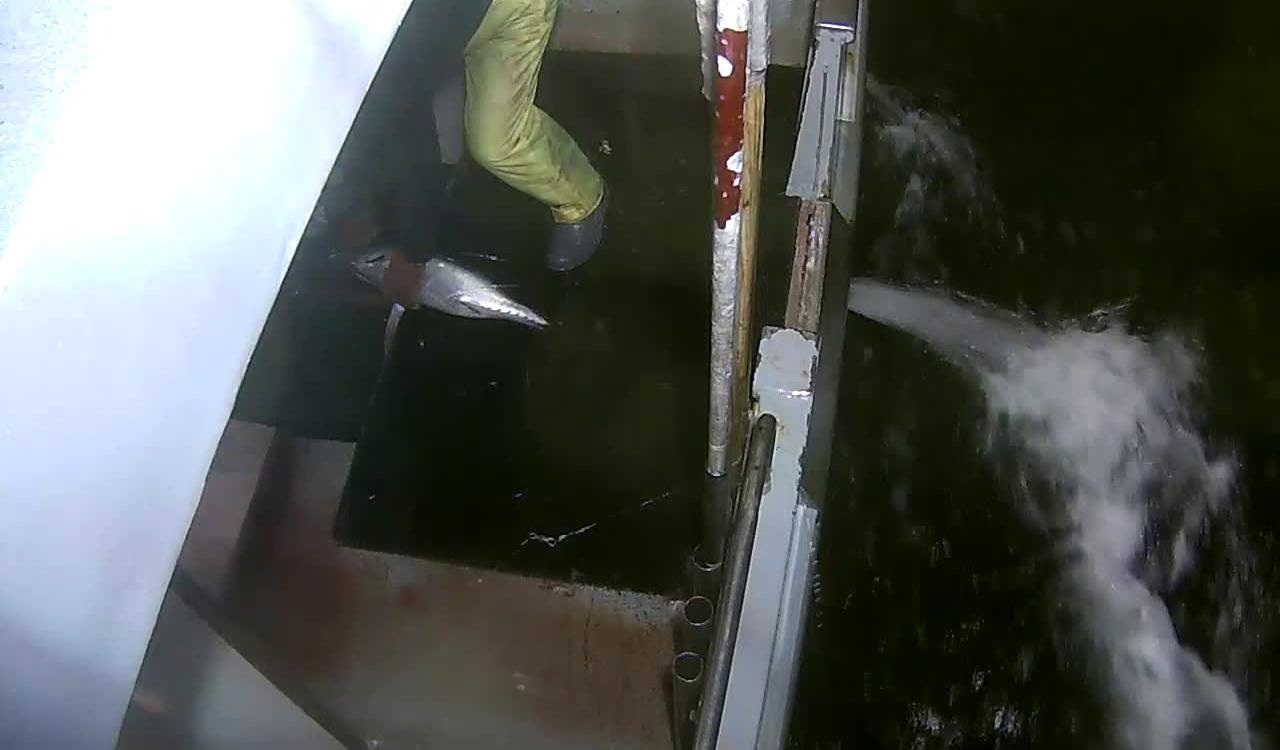

   3
 224
 224
[torch.LongStorage of size 3]



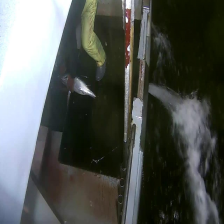

In [10]:
local img=image.load(t[1][1],3)
print(img:size())
itorch.image(img)
img=image.scale(img,224,224)
print(img:size())
itorch.image(img)
image.save("img.jpg",img)

In [11]:
for i=1,#t do
   local img=image.load(t[i][1],3)
    datasets[i]=image.scale(img,224,224)
    labels[i]=items[t[i][2]]
    xlua.progress(i,#t)
    end

 [=============================================>]                                Tot: 2m32s | Step: 43ms 

In [12]:
print(datasets:size())
print(labels:size())

 3777
    3
  224
  224
[torch.LongStorage of size 4]

 3777
[torch.LongStorage of size 1]



In [16]:
--torch.save('train.t7',dataset)
--torch.save('labels.t7',labels)

0	


In [18]:
trainData = {
   data = datasets:clone(),
   labels = labels:clone(),
   size = function() return #data end
}

In [19]:
datasets=nil
labels=nil
classes=nil
t=nil
collectgarbage()

In [20]:
trainData.data:size()[1]

3777	


In [21]:
require 'nn'

{
  VolumetricMaxUnpooling : table: 0x40d4e6e0
  ConcatTable : table: 0x410d9f98
  MV : table: 0x41220650
  SpatialAveragePooling : table: 0x40997f60
  SpatialConvolutionMM : table: 0x40a5b528
  VolumetricReplicationPadding : table: 0x40d534b8
  Reshape : table: 0x41db92c0
  Jacobian : 
    {
      forward : function: 0x41225538
      testAllUpdate : function: 0x41222a70
      testDiagHessianInput : function: 0x41225598
      testDiagHessianWeight : function: 0x41225600
      testDiagHessianBias : function: 0x41225620
      testDiagHessian : function: 0x41225578
      testJacobian : function: 0x41221f10
      testIO : function: 0x41225640
      testJacobianUpdateParameters : function: 0x41225558
      backwardDiagHessian : function: 0x412255c0
      testJacobianParameters : function: 0x412254e0
      backwardUpdate : function: 0x41225518
      forwardUpdate : function: 0x41221ef0
      backward : function: 0x412254c0
      linearModuleDiagHessian : function: 0x412255e0
    }
  SparseLi

     random : function: 0x40a5fcf8
    }
  DepthConcat : table: 0x403ebcc0
  Sigmoid : table: 0x40c3dfa8
  SpatialAdaptiveMaxPooling : table: 0x4099ad18
  Parallel : table: 0x40065f10
  SoftShrink : table: 0x41043bd8
  CMinTable : table: 0x41a85d00
  SpatialSubtractiveNormalization : table: 0x409a4550
  GPU : table: 0x40d57e10
  Log : table: 0x40c396b8
  VolumetricDropout : table: 0x400598e8
  SpatialDropout : table: 0x4087b878
  LeakyReLU : table: 0x4104c7a8
  VolumetricMaxPooling : table: 0x40d4af58
  TemporalDynamicKMaxPooling : table: 0x409a2f30
  hessian : 
    {
      enable : function: 0x4122ae08
    }
  Linear : table: 0x4114fd90
  Euclidean : table: 0x41582690
  CriterionTable : table: 0x41dad6b0
  SpatialMaxPooling : table: 0x41f50358
  MaskedSelect : table: 0x40c54270
  MultiMarginCriterion : table: 0x409219c0
  ELU : table: 0x41593c68
  Threshold : table: 0x41045d38
  SpatialReflectionPadding : table: 0x409b2930
  Copy : table: 0x4039b6a0
  Unsqueeze : table: 0x415878e8
  V

e: 0x40c47898
  Sum : table: 0x4087e2c8
  SoftSign : table: 0x41dabc88
  LogSigmoid : table: 0x40c3dad0
  CSubTable : table: 0x40c48ab8
  Min : table: 0x40c41c08
  SpatialLPPooling : table: 0x40996898
  Tanh : table: 0x41dad1a8
  ReLU6 : table: 0x41048478
  SpatialMaxUnpooling : table: 0x41f55b30
  Select : table: 0x40869c50
  BatchNormalization : table: 0x40448c10
  Mul : table: 0x40384bf8
  VolumetricDilatedConvolution : table: 0x40d47ce8
  SpatialConvolution : table: 0x4159cd38
  GradientReversal : table: 0x4100d930
  SpatialConvolutionMap : table: 0x40a5fbf0
  CMaxTable : table: 0x40c48550
  ReLU : table: 0x41046b98
  Padding : table: 0x410138c8
  SpatialDilatedConvolution : table: 0x40a5ecf0
  SpatialFullConvolution : table: 0x40a54c90
  AddConstant : table: 0x4103cf60
  RReLU : table: 0x415923a0
  SpatialZeroPadding : table: 0x409aec88
  SpatialFullConvolutionMap : table: 0x40a57450
  Narrow : table: 0x4038b550
  SpatialUpSamplingNearest : table: 0x40d384a0
  SpatialBatchNormaliz

In [22]:
normalization = nn.SpatialContrastiveNormalization(1, image.gaussian1D(7))
for i = 1,trainData.data:size()[1] do
   -- rgb -> yuv
   local rgb = trainData.data[i]
   local yuv = image.rgb2yuv(rgb)
   -- normalize y locally:
   yuv[1] = normalization(yuv[{{1}}])
   trainData.data[i] = yuv
end
-- normalize u globally:
mean_u = trainData.data[{ {},2,{},{} }]:mean()
std_u = trainData.data[{ {},2,{},{} }]:std()
trainData.data[{ {},2,{},{} }]:add(-mean_u)
trainData.data[{ {},2,{},{} }]:div(-std_u)
-- normalize v globally:
mean_v = trainData.data[{ {},3,{},{} }]:mean()
std_v = trainData.data[{ {},3,{},{} }]:std()
trainData.data[{ {},3,{},{} }]:add(-mean_v)
trainData.data[{ {},3,{},{} }]:div(-std_v)

In [134]:
--torch.save('train.t7',trainData)

In [63]:
require 'nn'

Found Environment variable CUDNN_PATH = /usr/local/cuda/lib64/libcudnn.so.5	


In [69]:
--[[ require 'cunn'
require 'cudnn'
model = nn.Sequential()

model:add(cudnn.SpatialConvolution(3,96,11,11,4,4,5,5))
model:add(cudnn.Relu)
model:add(cudnn.SpatialConvolution(96,96, 1,1))
model:add(cudnn.ReLU)
model:add(cudnn.SpatialConvolution(96,96, 1,1))
model:add(cudnn.ReLU)
model:add(cudnn.SpatialMaxPooling(3,3,2,2,1,1))

model:add(cudnn.SpatialConvolution(96,256,5,5,1,1,2,2))
model:add(cudnn.Relu)
model:add(cudnn.SpatialConvolution(256,256, 1,1))
model:add(cudnn.ReLU)
model:add(cudnn.SpatialConvolution(256,256, 1,1))
model:add(cudnn.ReLU)
model:add(cudnn.SpatialMaxPooling(3,3,2,2,1,1))

model:add(cudnn.SpatialConvolution(256,384,3,3,1,1,1,1))
model:add(cudnn.Relu)
model:add(cudnn.SpatialConvolution(384,384, 1,1))
model:add(cudnn.ReLU)
model:add(cudnn.SpatialConvolution(384,384, 1,1))
model:add(cudnn.ReLU)
model:add(cudnn.SpatialMaxPooling(3,3,2,2,1,1))

model:add(cudnn.SpatialConvolution(384,1024,3,3,1,1,1,1))
model:add(cudnn.Relu)
model:add(cudnn.SpatialConvolution(1024,1024, 1,1))
model:add(cudnn.ReLU)
model:add(cudnn.SpatialConvolution(1024,1024, 1,1))
model:add(cudnn.ReLU)
model:add(cudnn.SpatialMaxPooling(7,7,1,1))
model:add(nn.View(-1))
model:add(nn.Linear(104, 8))
model:add(cudnn.LogSoftMax())

print(model)
]]--


In [23]:
-- For GPU
require 'cunn'
require 'cudnn'
require 'cutorch'
model=nil
model = nn.Sequential()
local m = cudnn.SpatialConvolution(3,96,11,11,4,4,5,5)
model:add(m):add(cudnn.ReLU(true))
local m1= cudnn.SpatialConvolution(96,96, 1,1)
model:add(m1):add(cudnn.ReLU(true))
local m2= cudnn.SpatialConvolution(96,96, 1,1)
model:add(m2):add(cudnn.ReLU(true))

model:add(cudnn.SpatialMaxPooling(3,3,2,2,1,1))
local m3= cudnn.SpatialConvolution(96,256,5,5,1,1,2,2)
model:add(m3):add(cudnn.ReLU(true))

local m4= cudnn.SpatialConvolution(256,256, 1,1)
model:add(m4):add(cudnn.ReLU(true))

local m5= cudnn.SpatialConvolution(256,256, 1,1)
model:add(m5):add(cudnn.ReLU(true))

model:add(cudnn.SpatialMaxPooling(3,3,2,2,1,1))

local m6 = cudnn.SpatialConvolution(256,384,3,3,1,1,1,1)
model:add(m6):add(cudnn.ReLU(true))

local m7 = cudnn.SpatialConvolution(384,384, 1,1)
model:add(m7):add(cudnn.ReLU(true))

local m8 = cudnn.SpatialConvolution(384,384, 1,1)
model:add(m8):add(cudnn.ReLU(true))
model:add(cudnn.SpatialMaxPooling(3,3,2,2,1,1))

local m9 = cudnn.SpatialConvolution(384,1024,3,3,1,1,1,1)
model:add(m9):add(cudnn.ReLU(true))

local m10 =cudnn.SpatialConvolution(1024,1024, 1,1)
model:add(m10):add(cudnn.ReLU(true))

local m11 =cudnn.SpatialConvolution(1024,1024, 1,1)
model:add(m11):add(cudnn.ReLU(true))

model:add(cudnn.SpatialMaxPooling(7,7,1,1))
model:add(nn.View(-1))
model:add(nn.Linear(1024, 8))
model:add(nn.LogSoftMax())

print(model)

Found Environment variable CUDNN_PATH = /usr/local/cuda/lib64/libcudnn.so.5	


nn.Sequential {
  [input -> (1) -> (2) -> (3) -> (4) -> (5) -> (6) -> (7) -> (8) -> (9) -> (10) -> (11) -> (12) -> (13) -> (14) -> (15) -> (16) -> (17) -> (18) -> (19) -> (20) -> (21) -> (22) -> (23) -> (24) -> (25) -> (26) -> (27) -> (28) -> (29) -> (30) -> (31) -> output]
  (1): cudnn.SpatialConvolution(3 -> 96, 11x11, 4,4, 5,5)
  (2): cudnn.ReLU
  (3): cudnn.SpatialConvolution(96 -> 96, 1x1)
  (4): cudnn.ReLU
  (5): cudnn.SpatialConvolution(96 -> 96, 1x1)
  (6): cudnn.ReLU
  (7): cudnn.SpatialMaxPooling(3x3, 2,2, 1,1)
  (8): cudnn.SpatialConvolution(96 -> 256, 5x5, 1,1, 2,2)
  (9): cudnn.ReLU
  (10): cudnn.SpatialConvolution(256 -> 256, 1x1)
  (11): cudnn.ReLU
  (12): cudnn.SpatialConvolution(256 -> 256, 1x1)
  (13): cudnn.ReLU
  (14): cudnn.SpatialMaxPooling(3x3, 2,2, 1,1)
  (15): cudnn.SpatialConvolution(256 -> 384, 3x3, 1,1, 1,1)
  (16): cudnn.ReLU
  (17): cudnn.SpatialConvolution(384 -> 384, 1x1)
  (18): cudnn.ReLU
  (19): cudnn.SpatialConvolution(384 -> 384, 1x1)
  (20): cudnn.


          weight : DoubleTensor - size: 96x3x11x11
          gradWeight : DoubleTensor - size: 96x3x11x11
          padH : 5
          bias : DoubleTensor - size: 96
          gradBias : DoubleTensor - size: 96
        }
      2 : 
        cudnn.ReLU
        {
          gradInput : DoubleTensor - empty
          inplace : true
          _type : torch.DoubleTensor
          output : DoubleTensor - empty
        }
      3 : 
        cudnn.SpatialConvolution(96 -> 96, 1x1)
        {
          padW : 0
          nInputPlane : 96
          output : DoubleTensor - empty
          gradInput : DoubleTensor - empty
          _type : torch.DoubleTensor
          groups : 1
          dH : 1
          dW : 1
          nOutputPlane : 96
          kW : 1
          kH : 1
          weight : DoubleTensor - size: 96x96x1x1
          gradWeight : DoubleTensor - size: 96x96x1x1
          padH : 0
          bias : DoubleTensor - size: 96
          gradBias : DoubleTensor - size: 96
        }
      4 : 
 

         kH : 3
          padW : 1
        }
      8 : 
        cudnn.SpatialConvolution(96 -> 256, 5x5, 1,1, 2,2)
        {
          padW : 2
          nInputPlane : 96
          output : DoubleTensor - empty
          gradInput : DoubleTensor - empty
          _type : torch.DoubleTensor
          groups : 1
          dH : 1
          dW : 1
          nOutputPlane : 256
          kW : 5
          kH : 5
          weight : DoubleTensor - size: 256x96x5x5
          gradWeight : DoubleTensor - size: 256x96x5x5
          padH : 2
          bias : DoubleTensor - size: 256
          gradBias : DoubleTensor - size: 256
        }
      9 : 
        cudnn.ReLU
        {
          gradInput : DoubleTensor - empty
          inplace : true
          _type : torch.DoubleTensor
          output : DoubleTensor - empty
        }
      10 : 
        cudnn.SpatialConvolution(256 -> 256, 1x1)
        {
          padW : 0
          nInputPlane : 256
          output : DoubleTensor - empty
          grad

gradInput : DoubleTensor - empty
          inplace : true
          _type : torch.DoubleTensor
          output : DoubleTensor - empty
        }
      14 : 
        cudnn.SpatialMaxPooling(3x3, 2,2, 1,1)
        {
          dH : 2
          dW : 2
          kW : 3
          gradInput : DoubleTensor - empty
          iSize : LongStorage - size: 4
          _type : torch.DoubleTensor
          padH : 1
          ceil_mode : false
          output : DoubleTensor - empty
          kH : 3
          padW : 1
        }
      15 : 
        cudnn.SpatialConvolution(256 -> 384, 3x3, 1,1, 1,1)
        {
          padW : 1
          nInputPlane : 256
          output : DoubleTensor - empty
          gradInput : DoubleTensor - empty
          _type : torch.DoubleTensor
          groups : 1
          dH : 1
          dW : 1
          nOutputPlane : 384
          kW : 3
          kH : 3
          weight : DoubleTensor - size: 384x256x3x3
          gradWeight : DoubleTensor - size: 384x256x3x3
       

bias : DoubleTensor - size: 384
          gradBias : DoubleTensor - size: 384
        }
      20 : 
        cudnn.ReLU
        {
          gradInput : DoubleTensor - empty
          inplace : true
          _type : torch.DoubleTensor
          output : DoubleTensor - empty
        }
      21 : 
        cudnn.SpatialMaxPooling(3x3, 2,2, 1,1)
        {
          dH : 2
          dW : 2
          kW : 3
          gradInput : DoubleTensor - empty
          iSize : LongStorage - size: 4
          _type : torch.DoubleTensor
          padH : 1
          ceil_mode : false
          output : DoubleTensor - empty
          kH : 3
          padW : 1
        }
      22 : 
        cudnn.SpatialConvolution(384 -> 1024, 3x3, 1,1, 1,1)
        {
          padW : 1
          nInputPlane : 384
          output : DoubleTensor - empty
          gradInput : DoubleTensor - empty
          _type : torch.DoubleTensor
          groups : 1
          dH : 1
          dW : 1
          nOutputPlane : 1024
        

 nOutputPlane : 1024
          kW : 1
          kH : 1
          weight : DoubleTensor - size: 1024x1024x1x1
          gradWeight : DoubleTensor - size: 1024x1024x1x1
          padH : 0
          bias : DoubleTensor - size: 1024
          gradBias : DoubleTensor - size: 1024
        }
      27 : 
        cudnn.ReLU
        {
          gradInput : DoubleTensor - empty
          inplace : true
          _type : torch.DoubleTensor
          output : DoubleTensor - empty
        }
      28 : 
        cudnn.SpatialMaxPooling(7x7, 1,1)
        {
          dH : 1
          dW : 1
          kW : 7
          gradInput : DoubleTensor - empty
          iSize : LongStorage - size: 4
          _type : torch.DoubleTensor
          padH : 0
          ceil_mode : false
          output : DoubleTensor - empty
          kH : 7
          padW : 0
        }
      29 : 
        nn.View(-1)
        {
          _type : torch.DoubleTensor
          output : DoubleTensor - empty
          gradInput : DoubleTen

In [140]:
require 'nn'
--require 'cudnn'
--require 'cutorch'
model=nil
model = nn.Sequential()
local m = nn.SpatialConvolution(3,96,11,11,4,4,5,5)
model:add(m):add(nn.ReLU(true))
local m1= nn.SpatialConvolution(96,96, 1,1)
model:add(m1):add(nn.ReLU(true))
local m2= nn.SpatialConvolution(96,96, 1,1)
model:add(m2):add(nn.ReLU(true))

model:add(nn.SpatialMaxPooling(3,3,2,2,1,1))
local m3= nn.SpatialConvolution(96,256,5,5,1,1,2,2)
model:add(m3):add(nn.ReLU(true))

local m4= nn.SpatialConvolution(256,256, 1,1)
model:add(m4):add(nn.ReLU(true))

local m5= nn.SpatialConvolution(256,256, 1,1)
model:add(m5):add(nn.ReLU(true))

model:add(nn.SpatialMaxPooling(3,3,2,2,1,1))

local m6 = nn.SpatialConvolution(256,384,3,3,1,1,1,1)
model:add(m6):add(nn.ReLU(true))

local m7 = nn.SpatialConvolution(384,384, 1,1)
model:add(m7):add(nn.ReLU(true))

local m8 = nn.SpatialConvolution(384,384, 1,1)
model:add(m8):add(nn.ReLU(true))
model:add(nn.SpatialMaxPooling(3,3,2,2,1,1))

local m9 = nn.SpatialConvolution(384,1024,3,3,1,1,1,1)
model:add(m9):add(nn.ReLU(true))

local m10 =nn.SpatialConvolution(1024,1024, 1,1)
model:add(m10):add(nn.ReLU(true))

local m11 =nn.SpatialConvolution(1024,1024, 1,1)
model:add(m11):add(nn.ReLU(true))

model:add(nn.SpatialMaxPooling(7,7,1,1))
model:add(nn.View(-1))
model:add(nn.Linear(1024, 8))
model:add(nn.LogSoftMax())

print(model)

nn.Sequential {
  [input -> (1) -> (2) -> (3) -> (4) -> (5) -> (6) -> (7) -> (8) -> (9) -> (10) -> (11) -> (12) -> (13) -> (14) -> (15) -> (16) -> (17) -> (18) -> (19) -> (20) -> (21) -> (22) -> (23) -> (24) -> (25) -> (26) -> (27) -> (28) -> (29) -> (30) -> (31) -> output]
  (1): nn.SpatialConvolution(3 -> 96, 11x11, 4,4, 5,5)
  (2): nn.ReLU
  (3): nn.SpatialConvolution(96 -> 96, 1x1)
  (4): nn.ReLU
  (5): nn.SpatialConvolution(96 -> 96, 1x1)
  (6): nn.ReLU
  (7): nn.SpatialMaxPooling(3x3, 2,2, 1,1)
  (8): nn.SpatialConvolution(96 -> 256, 5x5, 1,1, 2,2)
  (9): nn.ReLU
  (10): nn.SpatialConvolution(256 -> 256, 1x1)
  (11): nn.ReLU
  (12): nn.SpatialConvolution(256 -> 256, 1x1)
  (13): nn.ReLU
  (14): nn.SpatialMaxPooling(3x3, 2,2, 1,1)
  (15): nn.SpatialConvolution(256 -> 384, 3x3, 1,1, 1,1)
  (16): nn.ReLU
  (17): nn.SpatialConvolution(384 -> 384, 1x1)
  (18): nn.ReLU
  (19): nn.SpatialConvolution(384 -> 384, 1x1)
  (20): nn.ReLU
  (21): nn.SpatialMaxPooling(3x3, 2,2, 1,1)
  (22): nn.

          kH : 1
          gradBias : DoubleTensor - size: 96
          padH : 0
          bias : DoubleTensor - size: 96
          weight : DoubleTensor - size: 96x96x1x1
          _type : torch.DoubleTensor
          gradWeight : DoubleTensor - size: 96x96x1x1
          padW : 0
          nOutputPlane : 96
          kW : 1
          gradInput : DoubleTensor - empty
        }
      4 : 
        nn.ReLU
        {
          inplace : true
          threshold : 0
          _type : torch.DoubleTensor
          output : DoubleTensor - empty
          gradInput : DoubleTensor - empty
          val : 0
        }
      5 : 
        nn.SpatialConvolution(96 -> 96, 1x1)
        {
          dH : 1
          dW : 1
          nInputPlane : 96
          output : DoubleTensor - empty
          kH : 1
          gradBias : DoubleTensor - size: 96
          padH : 0
          bias : DoubleTensor - size: 96
          weight : DoubleTensor - size: 96x96x1x1
          _type : torch.DoubleTensor
          

       ceil_mode : false
          output : DoubleTensor - empty
          kH : 3
          padW : 1
        }
      8 : 
        nn.SpatialConvolution(96 -> 256, 5x5, 1,1, 2,2)
        {
          dH : 1
          dW : 1
          nInputPlane : 96
          output : DoubleTensor - empty
          kH : 5
          gradBias : DoubleTensor - size: 256
          padH : 2
          bias : DoubleTensor - size: 256
          weight : DoubleTensor - size: 256x96x5x5
          _type : torch.DoubleTensor
          gradWeight : DoubleTensor - size: 256x96x5x5
          padW : 2
          nOutputPlane : 256
          kW : 5
          gradInput : DoubleTensor - empty
        }
      9 : 
        nn.ReLU
        {
          inplace : true
          threshold : 0
          _type : torch.DoubleTensor
          output : DoubleTensor - empty
          gradInput : DoubleTensor - empty
          val : 0
        }
      10 : 
        nn.SpatialConvolution(256 -> 256, 1x1)
        {
          dH : 1
      

          padH : 0
          bias : DoubleTensor - size: 256
          weight : DoubleTensor - size: 256x256x1x1
          _type : torch.DoubleTensor
          gradWeight : DoubleTensor - size: 256x256x1x1
          padW : 0
          nOutputPlane : 256
          kW : 1
          gradInput : DoubleTensor - empty
        }
      11 : 
        nn.ReLU
        {
          inplace : true
          threshold : 0
          _type : torch.DoubleTensor
          output : DoubleTensor - empty
          gradInput : DoubleTensor - empty
          val : 0
        }
      12 : 
        nn.SpatialConvolution(256 -> 256, 1x1)
        {
          dH : 1
          dW : 1
          nInputPlane : 256
          output : DoubleTensor - empty
          kH : 1
          gradBias : DoubleTensor - size: 256
          padH : 0
          bias : DoubleTensor - size: 256
          weight : DoubleTensor - size: 256x256x1x1
          _type : torch.DoubleTensor
          gradWeight : DoubleTensor - size: 256x256x1x1
 

          indices : DoubleTensor - empty
          _type : torch.DoubleTensor
          padH : 1
          ceil_mode : false
          output : DoubleTensor - empty
          kH : 3
          padW : 1
        }
      15 : 
        nn.SpatialConvolution(256 -> 384, 3x3, 1,1, 1,1)
        {
          dH : 1
          dW : 1
          nInputPlane : 256
          output : DoubleTensor - empty
          kH : 3
          gradBias : DoubleTensor - size: 384
          padH : 1
          bias : DoubleTensor - size: 384
          weight : DoubleTensor - size: 384x256x3x3
          _type : torch.DoubleTensor
          gradWeight : DoubleTensor - size: 384x256x3x3
          padW : 1
          nOutputPlane : 384
          kW : 3
          gradInput : DoubleTensor - empty
        }
      16 : 
        nn.ReLU
        {
          inplace : true
          threshold : 0
          _type : torch.DoubleTensor
          output : DoubleTensor - empty
          gradInput : DoubleTensor - empty
          val 

     nOutputPlane : 384
          kW : 1
          gradInput : DoubleTensor - empty
        }
      18 : 
        nn.ReLU
        {
          inplace : true
          threshold : 0
          _type : torch.DoubleTensor
          output : DoubleTensor - empty
          gradInput : DoubleTensor - empty
          val : 0
        }
      19 : 
        nn.SpatialConvolution(384 -> 384, 1x1)
        {
          dH : 1
          dW : 1
          nInputPlane : 384
          output : DoubleTensor - empty
          kH : 1
          gradBias : DoubleTensor - size: 384
          padH : 0
          bias : DoubleTensor - size: 384
          weight : DoubleTensor - size: 384x384x1x1
          _type : torch.DoubleTensor
          gradWeight : DoubleTensor - size: 384x384x1x1
          padW : 0
          nOutputPlane : 384
          kW : 1
          gradInput : DoubleTensor - empty
        }
      20 : 
        nn.ReLU
        {
          inplace : true
          threshold : 0
          _type : torch.Do

        nn.SpatialConvolution(384 -> 1024, 3x3, 1,1, 1,1)
        {
          dH : 1
          dW : 1
          nInputPlane : 384
          output : DoubleTensor - empty
          kH : 3
          gradBias : DoubleTensor - size: 1024
          padH : 1
          bias : DoubleTensor - size: 1024
          weight : DoubleTensor - size: 1024x384x3x3
          _type : torch.DoubleTensor
          gradWeight : DoubleTensor - size: 1024x384x3x3
          padW : 1
          nOutputPlane : 1024
          kW : 3
          gradInput : DoubleTensor - empty
        }
      23 : 
        nn.ReLU
        {
          inplace : true
          threshold : 0
          _type : torch.DoubleTensor
          output : DoubleTensor - empty
          gradInput : DoubleTensor - empty
          val : 0
        }
      24 : 
        nn.SpatialConvolution(1024 -> 1024, 1x1)
        {
          dH : 1
          dW : 1
          nInputPlane : 1024
          output : DoubleTensor - empty
          kH : 1
          gr

        nn.SpatialConvolution(1024 -> 1024, 1x1)
        {
          dH : 1
          dW : 1
          nInputPlane : 1024
          output : DoubleTensor - empty
          kH : 1
          gradBias : DoubleTensor - size: 1024
          padH : 0
          bias : DoubleTensor - size: 1024
          weight : DoubleTensor - size: 1024x1024x1x1
          _type : torch.DoubleTensor
          gradWeight : DoubleTensor - size: 1024x1024x1x1
          padW : 0
          nOutputPlane : 1024
          kW : 1
          gradInput : DoubleTensor - empty
        }
      27 : 
        nn.ReLU
        {
          inplace : true
          threshold : 0
          _type : torch.DoubleTensor
          output : DoubleTensor - empty
          gradInput : DoubleTensor - empty
          val : 0
        }
      28 : 
        nn.SpatialMaxPooling(7x7, 1,1)
        {
          dH : 1
          dW : 1
          kW : 7
          gradInput : DoubleTensor - empty
          indices : DoubleTensor - empty
          _ty

          gradBias : DoubleTensor - size: 8
          weight : DoubleTensor - size: 8x1024
          _type : torch.DoubleTensor
          output : DoubleTensor - empty
          gradInput : DoubleTensor - empty


          bias : DoubleTensor - size: 8
          gradWeight : DoubleTensor - size: 8x1024
        }
      31 : 
        nn.LogSoftMax
        {
          gradInput : DoubleTensor - empty
          _type : torch.DoubleTensor
          output : DoubleTensor - empty
        }
    }
  _type : torch.DoubleTensor
  output : DoubleTensor - empty
}


In [24]:
batchSize=64
optimization='SGD'
maxIter=5
learningRate=1e-3
momentum=0
weightDecay=0
t0=1
--save=fname:gsub('.lua','')

In [25]:
model:cuda()
-- retrieve parameters and gradients
parameters,gradParameters = model:getParameters()
--criterion = cudnn.SpatialCrossEntropyCriterion() --cudnn.ClassNLLCriterion()

In [33]:
criterion=nil
criterion=nn.ClassNLLCriterion()
criterion = criterion:cuda()

In [26]:
trainData.data=trainData.data:cuda()

In [27]:
trainData.labels=trainData.labels:cuda()

In [36]:
require 'optim'
classes={'DOL', 'OTHER', 'BET','LAG','ALB','YFT','SHARK','NoF'}
confusion = optim.ConfusionMatrix(classes)
-- training function
function train(dataset)
   -- epoch tracker
   epoch = epoch or 1
   
   -- local vars
   local time = sys.clock()
   local trainError = 0

   -- do one epoch
   print('<trainer> on training set:')
   print("<trainer> online epoch # " .. epoch .. ' [batchSize = ' .. batchSize .. ']')
    print(dataset.data:size()[1])
   for t = 1,dataset.data:size()[1],batchSize do
      -- disp progress
      xlua.progress(t, dataset.data:size()[1])

      -- create mini batch
      local inputs = {}
      local targets = {}
      for i = t,math.min(t+batchSize-1,dataset.data:size()[1]) do
         -- load new sample
         local input = dataset.data[i]
         local target = dataset.labels[i]
         table.insert(inputs, input)
         table.insert(targets, target)
      end

      -- create closure to evaluate f(X) and df/dX
      local feval = function(x)
         -- get new parameters
         if x ~= parameters then
            parameters:copy(x)
         end

         -- reset gradients
         gradParameters:zero()

         -- f is the average of all criterions
         local f = 0

         -- evaluate function for complete mini batch
         for i = 1,#inputs do
            -- estimate f
            local output = model:forward(inputs[i])
            local err = criterion:forward(output, targets[i])
            f = f + err

            -- estimate df/dW
            local df_do = criterion:backward(output, targets[i])
            model:backward(inputs[i], df_do)

            -- update confusion
            confusion:add(output, targets[i])

            -- visualize?
            --if visualize then
             --  display(inputs[i])
           -- end
         end

         -- normalize gradients and f(X)
         gradParameters:div(#inputs)
         f = f/#inputs
         trainError = trainError + f

         -- return f and df/dX
         return f,gradParameters
      end

      -- optimize on current mini-batch
      if optimization == 'CG' then
         config = config or {maxIter = maxIter}
         optim.cg(feval, parameters, config)

      elseif optimization == 'LBFGS' then
         config = config or {learningRate = learningRate,
                             maxIter = maxIter,
                             nCorrection = 10}
         optim.lbfgs(feval, parameters, config)

      elseif optimization == 'SGD' then
         config = config or {learningRate = learningRate,
                             weightDecay = weightDecay,
                             momentum = momentum,
                             learningRateDecay = 5e-7}
         optim.sgd(feval, parameters, config)

      elseif optimization == 'ASGD' then
         config = config or {eta0 = learningRate,
                             t0 = nbTrainingPatches * t0}
         _,_,average = optim.asgd(feval, parameters, config)

      else
         error('unknown optimization method')
      end
   end

   -- train error
   trainError = trainError / math.floor(dataset.data:size()[1]/batchSize)

   -- time taken
   time = sys.clock() - time
   time = time / dataset.data:size()[1]
   print("<trainer> time to learn 1 sample = " .. (time*1000) .. 'ms')

   -- print confusion matrix
   print(confusion)
   local trainAccuracy = confusion.totalValid * 100
   confusion:zero()

   -- save/log current net
  -- local filename = paths.concat('save/log', 'cifar.net')
 --  os.execute('mkdir -p ' .. paths.dirname(filename))
  -- if paths.filep(filename) then
   --   os.execute('mv ' .. filename .. ' ' .. filename .. '.old')
  -- end
  -- print('<trainer> saving network to '..filename)
  -- torch.save(filename, model)

   -- next epoch
   epoch = epoch + 1

   return trainAccuracy, trainError
end

In [ ]:
-- trainAcc, trainErr = train(trainData)
while true do
    trainAcc, trainErr = train(trainData)
    end
   -- train/test
  -- trainAcc, trainErr = train(trainData)
 --  testAcc,  testErr  = test (testData)

   -- update logger
  -- accLogger:add{['% train accuracy'] = trainAcc}
  -- errLogger:add{['% train error']    = trainErr}

   -- plot logger
  -- accLogger:style{['% train accuracy'] = '-'}
  -- errLogger:style{['% train error']    = '-'}
  -- accLogger:plot()
  -- errLogger:plot()


<trainer> on training set:	
<trainer> online epoch # 3 [batchSize = 64]	
3777	


 [=============================================>]                                Tot: 36s180ms | Step: 9ms 

<trainer> time to learn 1 sample = 9.9259975696955ms	
ConfusionMatrix:
[[       0       0       0       0     117       0       0       0]   0.000% 	[class: DOL]
 [       0       0       0       0     299       0       0       0]   0.000% 	[class: OTHER]
 [       0       0       0       0     200       0       0       0]   0.000% 	[class: BET]
 [       0       0       0       0      67       0       0       0]   0.000% 	[class: LAG]
 [       0       0       0       0    1719       0       0       0]   100.000% 	[class: ALB]
 [       0       0       0       0     734       0       0       0]   0.000% 	[class: YFT]
 [       0       0       0       0     176       0       0       0]   0.000% 	[class: SHARK]
 [       0       0       0       0     465       0       0       0]]  0.000% 	[class: NoF]
 + average row correct: 12.5% 
 + average rowUcol correct (VOC measure): 5.6890390813351% 
 + global correct: 45.512311358221%
{
  _mat_flat : LongTensor - size: 64
  valids : FloatTensor - size:

 [=============================================>]                                Tot: 36s898ms | Step: 10ms 

<trainer> time to learn 1 sample = 10.110009748657ms	
ConfusionMatrix:
[[       0       0       0       0     117       0       0       0]   0.000% 	[class: DOL]
 [       0       0       0       0     299       0       0       0]   0.000% 	[class: OTHER]
 [       0       0       0       0     200       0       0       0]   0.000% 	[class: BET]
 [       0       0       0       0      67       0       0       0]   0.000% 	[class: LAG]
 [       0       0       0       0    1719       0       0       0]   100.000% 	[class: ALB]
 [       0       0       0       0     734       0       0       0]   0.000% 	[class: YFT]
 [       0       0       0       0     176       0       0       0]   0.000% 	[class: SHARK]
 [       0       0       0       0     465       0       0       0]]  0.000% 	[class: NoF]
 + average row correct: 12.5% 
 + average rowUcol correct (VOC measure): 5.6890390813351% 
 + global correct: 45.512311358221%
{
  _mat_flat : LongTensor - size: 64
  valids : FloatTensor - size:

 [=============================================>]                                Tot: 36s778ms | Step: 10ms 

<trainer> time to learn 1 sample = 10.095126293688ms	
ConfusionMatrix:
[[       0       0       0       0     117       0       0       0]   0.000% 	[class: DOL]
 [       0       0       0       0     299       0       0       0]   0.000% 	[class: OTHER]
 [       0       0       0       0     200       0       0       0]   0.000% 	[class: BET]
 [       0       0       0       0      67       0       0       0]   0.000% 	[class: LAG]
 [       0       0       0       0    1719       0       0       0]   100.000% 	[class: ALB]
 [       0       0       0       0     734       0       0       0]   0.000% 	[class: YFT]
 [       0       0       0       0     176       0       0       0]   0.000% 	[class: SHARK]
 [       0       0       0       0     465       0       0       0]]  0.000% 	[class: NoF]
 + average row correct: 12.5% 
 + average rowUcol correct (VOC measure): 5.6890390813351% 
 + global correct: 45.512311358221%
{
  _mat_flat : LongTensor - size: 64
  valids : FloatTensor - size:

      7 : SHARK
      8 : NoF
    }
  _prediction : FloatTensor - size: 8
  _pred_idx : LongTensor - size: 1
  nclasses : 8
  _max : FloatTensor - size: 1
  _target : FloatTensor - empty
  unionvalids : FloatTensor - size: 8
  totalValid : 0.45512311358221
}
<trainer> on training set:	
<trainer> online epoch # 6 [batchSize = 64]	
3777	


 [=============================================>]                                Tot: 36s475ms | Step: 9ms 

<trainer> time to learn 1 sample = 9.9998599232458ms	
ConfusionMatrix:
[[       0       0       0       0     117       0       0       0]   0.000% 	[class: DOL]
 [       0       0       0       0     299       0       0       0]   0.000% 	[class: OTHER]
 [       0       0       0       0     200       0       0       0]   0.000% 	[class: BET]
 [       0       0       0       0      67       0       0       0]   0.000% 	[class: LAG]
 [       0       0       0       0    1719       0       0       0]   100.000% 	[class: ALB]
 [       0       0       0       0     734       0       0       0]   0.000% 	[class: YFT]
 [       0       0       0       0     176       0       0       0]   0.000% 	[class: SHARK]
 [       0       0       0       0     465       0       0       0]]  0.000% 	[class: NoF]
 + average row correct: 12.5% 
 + average rowUcol correct (VOC measure): 5.6890390813351% 
 + global correct: 45.512311358221%
{
  _mat_flat : LongTensor - size: 64
  valids : FloatTensor - size:

<trainer> on training set:	
<trainer> online epoch # 7 [batchSize = 64]	
3777	


 [=============================================>]                                Tot: 36s445ms | Step: 9ms 

<trainer> time to learn 1 sample = 9.991936750566ms	
ConfusionMatrix:
[[       0       0       0       0     117       0       0       0]   0.000% 	[class: DOL]
 [       0       0       0       0     299       0       0       0]   0.000% 	[class: OTHER]
 [       0       0       0       0     200       0       0       0]   0.000% 	[class: BET]
 [       0       0       0       0      67       0       0       0]   0.000% 	[class: LAG]
 [       0       0       0       0    1719       0       0       0]   100.000% 	[class: ALB]
 [       0       0       0       0     734       0       0       0]   0.000% 	[class: YFT]
 [       0       0       0       0     176       0       0       0]   0.000% 	[class: SHARK]
 [       0       0       0       0     465       0       0       0]]  0.000% 	[class: NoF]
 + average row correct: 12.5% 
 + average rowUcol correct (VOC measure): 5.6890390813351% 
 + global correct: 45.512311358221%
{
  _mat_flat : LongTensor - size: 64
  valids : FloatTensor - size: 

 [=============================================>]                                Tot: 36s448ms | Step: 9ms 

<trainer> time to learn 1 sample = 9.9921085735399ms	
ConfusionMatrix:
[[       0       0       0       0     117       0       0       0]   0.000% 	[class: DOL]
 [       0       0       0       0     299       0       0       0]   0.000% 	[class: OTHER]
 [       0       0       0       0     200       0       0       0]   0.000% 	[class: BET]
 [       0       0       0       0      67       0       0       0]   0.000% 	[class: LAG]
 [       0       0       0       0    1719       0       0       0]   100.000% 	[class: ALB]
 [       0       0       0       0     734       0       0       0]   0.000% 	[class: YFT]
 [       0       0       0       0     176       0       0       0]   0.000% 	[class: SHARK]
 [       0       0       0       0     465       0       0       0]]  0.000% 	[class: NoF]
 + average row correct: 12.5% 
 + average rowUcol correct (VOC measure): 5.6890390813351% 
 + global correct: 45.512311358221%
{
  _mat_flat : LongTensor - size: 64
  valids : FloatTensor - size:

 [=============================================>]                                Tot: 36s444ms | Step: 9ms 

<trainer> time to learn 1 sample = 9.990414898958ms	
ConfusionMatrix:
[[       0       0       0       0     117       0       0       0]   0.000% 	[class: DOL]
 [       0       0       0       0     299       0       0       0]   0.000% 	[class: OTHER]
 [       0       0       0       0     200       0       0       0]   0.000% 	[class: BET]
 [       0       0       0       0      67       0       0       0]   0.000% 	[class: LAG]
 [       0       0       0       0    1719       0       0       0]   100.000% 	[class: ALB]
 [       0       0       0       0     734       0       0       0]   0.000% 	[class: YFT]
 [       0       0       0       0     176       0       0       0]   0.000% 	[class: SHARK]
 [       0       0       0       0     465       0       0       0]]  0.000% 	[class: NoF]
 + average row correct: 12.5% 
 + average rowUcol correct (VOC measure): 5.6890390813351% 
 + global correct: 45.512311358221%
{
  _mat_flat : LongTensor - size: 64
  valids : FloatTensor - size: 

 [=============================================>]                                Tot: 36s455ms | Step: 9ms 

<trainer> time to learn 1 sample = 9.9936849009842ms	
ConfusionMatrix:
[[       0       0       0       0     117       0       0       0]   0.000% 	[class: DOL]
 [       0       0       0       0     299       0       0       0]   0.000% 	[class: OTHER]
 [       0       0       0       0     200       0       0       0]   0.000% 	[class: BET]
 [       0       0       0       0      67       0       0       0]   0.000% 	[class: LAG]
 [       0       0       0       0    1719       0       0       0]   100.000% 	[class: ALB]
 [       0       0       0       0     734       0       0       0]   0.000% 	[class: YFT]
 [       0       0       0       0     176       0       0       0]   0.000% 	[class: SHARK]
 [       0       0       0       0     465       0       0       0]]  0.000% 	[class: NoF]
 + average row correct: 12.5% 
 + average rowUcol correct (VOC measure): 5.6890390813351% 
 + global correct: 45.512311358221%
{
  _mat_flat : LongTensor - size: 64
  valids : FloatTensor - size:

 [=============================================>]                                Tot: 36s456ms | Step: 9ms 

<trainer> time to learn 1 sample = 9.9941421697655ms	
ConfusionMatrix:
[[       0       0       0       0     117       0       0       0]   0.000% 	[class: DOL]
 [       0       0       0       0     299       0       0       0]   0.000% 	[class: OTHER]
 [       0       0       0       0     200       0       0       0]   0.000% 	[class: BET]
 [       0       0       0       0      67       0       0       0]   0.000% 	[class: LAG]
 [       0       0       0       0    1719       0       0       0]   100.000% 	[class: ALB]
 [       0       0       0       0     734       0       0       0]   0.000% 	[class: YFT]
 [       0       0       0       0     176       0       0       0]   0.000% 	[class: SHARK]
 [       0       0       0       0     465       0       0       0]]  0.000% 	[class: NoF]
 + average row correct: 12.5% 
 + average rowUcol correct (VOC measure): 5.6890390813351% 
 + global correct: 45.512311358221%
{
  _mat_flat : LongTensor - size: 64
  valids : FloatTensor - size:


  _prediction : FloatTensor - size: 8
  _pred_idx : LongTensor - size: 1
  nclasses : 8
  _max : FloatTensor - size: 1
  _target : FloatTensor - empty
  unionvalids : FloatTensor - size: 8
  totalValid : 0.45512311358221
}
<trainer> on training set:	
<trainer> online epoch # 12 [batchSize = 64]	
3777	


 [=============================================>]                                Tot: 36s460ms | Step: 9ms 

<trainer> time to learn 1 sample = 9.994981716258ms	
ConfusionMatrix:
[[       0       0       0       0     117       0       0       0]   0.000% 	[class: DOL]
 [       0       0       0       0     299       0       0       0]   0.000% 	[class: OTHER]
 [       0       0       0       0     200       0       0       0]   0.000% 	[class: BET]
 [       0       0       0       0      67       0       0       0]   0.000% 	[class: LAG]
 [       0       0       0       0    1719       0       0       0]   100.000% 	[class: ALB]
 [       0       0       0       0     734       0       0       0]   0.000% 	[class: YFT]
 [       0       0       0       0     176       0       0       0]   0.000% 	[class: SHARK]
 [       0       0       0       0     465       0       0       0]]  0.000% 	[class: NoF]
 + average row correct: 12.5% 
 + average rowUcol correct (VOC measure): 5.6890390813351% 
 + global correct: 45.512311358221%
{
  _mat_flat : LongTensor - size: 64
  valids : FloatTensor - size: 

  _target : FloatTensor - empty
  unionvalids : FloatTensor - size: 8
  totalValid : 0.45512311358221
}
<trainer> on training set:	
<trainer> online epoch # 13 [batchSize = 64]	
3777	


 [=============================================>]                                Tot: 36s922ms | Step: 10ms 

<trainer> time to learn 1 sample = 10.117513400586ms	
ConfusionMatrix:
[[       0       0       0       0     117       0       0       0]   0.000% 	[class: DOL]
 [       0       0       0       0     299       0       0       0]   0.000% 	[class: OTHER]
 [       0       0       0       0     200       0       0       0]   0.000% 	[class: BET]
 [       0       0       0       0      67       0       0       0]   0.000% 	[class: LAG]
 [       0       0       0       0    1719       0       0       0]   100.000% 	[class: ALB]
 [       0       0       0       0     734       0       0       0]   0.000% 	[class: YFT]
 [       0       0       0       0     176       0       0       0]   0.000% 	[class: SHARK]
 [       0       0       0       0     465       0       0       0]]  0.000% 	[class: NoF]
 + average row correct: 12.5% 
 + average rowUcol correct (VOC measure): 5.6890390813351% 
 + global correct: 45.512311358221%
{
  _mat_flat : LongTensor - size: 64
  valids : FloatTensor - size:

 [=============================================>]                                Tot: 36s582ms | Step: 10ms 

<trainer> time to learn 1 sample = 10.028640713236ms	
ConfusionMatrix:
[[       0       0       0       0     117       0       0       0]   0.000% 	[class: DOL]
 [       0       0       0       0     299       0       0       0]   0.000% 	[class: OTHER]
 [       0       0       0       0     200       0       0       0]   0.000% 	[class: BET]
 [       0       0       0       0      67       0       0       0]   0.000% 	[class: LAG]
 [       0       0       0       0    1719       0       0       0]   100.000% 	[class: ALB]
 [       0       0       0       0     734       0       0       0]   0.000% 	[class: YFT]
 [       0       0       0       0     176       0       0       0]   0.000% 	[class: SHARK]
 [       0       0       0       0     465       0       0       0]]  0.000% 	[class: NoF]
 + average row correct: 12.5% 
 + average rowUcol correct (VOC measure): 5.6890390813351% 
 + global correct: 45.512311358221%
{
  _mat_flat : LongTensor - size: 64
  valids : FloatTensor - size:

 [=============================================>]                                Tot: 36s439ms | Step: 9ms 

<trainer> time to learn 1 sample = 9.9881895326388ms	
ConfusionMatrix:
[[       0       0       0       0     117       0       0       0]   0.000% 	[class: DOL]
 [       0       0       0       0     299       0       0       0]   0.000% 	[class: OTHER]
 [       0       0       0       0     200       0       0       0]   0.000% 	[class: BET]
 [       0       0       0       0      67       0       0       0]   0.000% 	[class: LAG]
 [       0       0       0       0    1719       0       0       0]   100.000% 	[class: ALB]
 [       0       0       0       0     734       0       0       0]   0.000% 	[class: YFT]
 [       0       0       0       0     176       0       0       0]   0.000% 	[class: SHARK]
 [       0       0       0       0     465       0       0       0]]  0.000% 	[class: NoF]
 + average row correct: 12.5% 
 + average rowUcol correct (VOC measure): 5.6890390813351% 
 + global correct: 45.512311358221%
{
  _mat_flat : LongTensor - size: 64
  valids : FloatTensor - size:


  nclasses : 8
  _max : FloatTensor - size: 1
  _target : FloatTensor - empty
  unionvalids : FloatTensor - size: 8
  totalValid : 0.45512311358221
}
<trainer> on training set:	
<trainer> online epoch # 16 [batchSize = 64]	
3777	


 [=============================================>]                                Tot: 36s452ms | Step: 9ms 

<trainer> time to learn 1 sample = 9.9932266222222ms	
ConfusionMatrix:
[[       0       0       0       0     117       0       0       0]   0.000% 	[class: DOL]
 [       0       0       0       0     299       0       0       0]   0.000% 	[class: OTHER]
 [       0       0       0       0     200       0       0       0]   0.000% 	[class: BET]
 [       0       0       0       0      67       0       0       0]   0.000% 	[class: LAG]
 [       0       0       0       0    1719       0       0       0]   100.000% 	[class: ALB]
 [       0       0       0       0     734       0       0       0]   0.000% 	[class: YFT]
 [       0       0       0       0     176       0       0       0]   0.000% 	[class: SHARK]
 [       0       0       0       0     465       0       0       0]]  0.000% 	[class: NoF]
 + average row correct: 12.5% 
 + average rowUcol correct (VOC measure): 5.6890390813351% 
 + global correct: 45.512311358221%
{
  _mat_flat : LongTensor - size: 64
  valids : FloatTensor - size:

 [=============================================>]                                Tot: 36s584ms | Step: 10ms 

<trainer> time to learn 1 sample = 10.027690258233ms	
ConfusionMatrix:
[[       0       0       0       0     117       0       0       0]   0.000% 	[class: DOL]
 [       0       0       0       0     299       0       0       0]   0.000% 	[class: OTHER]
 [       0       0       0       0     200       0       0       0]   0.000% 	[class: BET]
 [       0       0       0       0      67       0       0       0]   0.000% 	[class: LAG]
 [       0       0       0       0    1719       0       0       0]   100.000% 	[class: ALB]
 [       0       0       0       0     734       0       0       0]   0.000% 	[class: YFT]
 [       0       0       0       0     176       0       0       0]   0.000% 	[class: SHARK]
 [       0       0       0       0     465       0       0       0]]  0.000% 	[class: NoF]
 + average row correct: 12.5% 
 + average rowUcol correct (VOC measure): 5.6890390813351% 
 + global correct: 45.512311358221%
{
  _mat_flat : LongTensor - size: 64
  valids : FloatTensor - size:

totalValid : 0.45512311358221
}
<trainer> on training set:	
<trainer> online epoch # 18 [batchSize = 64]	
3777	


 [=============================================>]                                Tot: 36s637ms | Step: 10ms 

<trainer> time to learn 1 sample = 10.042778423674ms	
ConfusionMatrix:
[[       0       0       0       0     117       0       0       0]   0.000% 	[class: DOL]
 [       0       0       0       0     299       0       0       0]   0.000% 	[class: OTHER]
 [       0       0       0       0     200       0       0       0]   0.000% 	[class: BET]
 [       0       0       0       0      67       0       0       0]   0.000% 	[class: LAG]
 [       0       0       0       0    1719       0       0       0]   100.000% 	[class: ALB]
 [       0       0       0       0     734       0       0       0]   0.000% 	[class: YFT]
 [       0       0       0       0     176       0       0       0]   0.000% 	[class: SHARK]
 [       0       0       0       0     465       0       0       0]]  0.000% 	[class: NoF]
 + average row correct: 12.5% 
 + average rowUcol correct (VOC measure): 5.6890390813351% 
 + global correct: 45.512311358221%
{
  _mat_flat : LongTensor - size: 64
  valids : FloatTensor - size:

      5 : ALB
      6 : YFT
      7 : SHARK
      8 : NoF
    }
  _prediction : FloatTensor - size: 8
  _pred_idx : LongTensor - size: 1
  nclasses : 8
  _max : FloatTensor - size: 1
  _target : FloatTensor - empty
  unionvalids : FloatTensor - size: 8
  totalValid : 0.45512311358221
}
<trainer> on training set:	
<trainer> online epoch # 19 [batchSize = 64]	
3777	


 [=============================================>]                                Tot: 36s648ms | Step: 10ms 

<trainer> time to learn 1 sample = 10.046408799454ms	
ConfusionMatrix:
[[       0       0       0       0     117       0       0       0]   0.000% 	[class: DOL]
 [       0       0       0       0     299       0       0       0]   0.000% 	[class: OTHER]
 [       0       0       0       0     200       0       0       0]   0.000% 	[class: BET]
 [       0       0       0       0      67       0       0       0]   0.000% 	[class: LAG]
 [       0       0       0       0    1719       0       0       0]   100.000% 	[class: ALB]
 [       0       0       0       0     734       0       0       0]   0.000% 	[class: YFT]
 [       0       0       0       0     176       0       0       0]   0.000% 	[class: SHARK]
 [       0       0       0       0     465       0       0       0]]  0.000% 	[class: NoF]
 + average row correct: 12.5% 
 + average rowUcol correct (VOC measure): 5.6890390813351% 
 + global correct: 45.512311358221%
{
  _mat_flat : LongTensor - size: 64
  valids : FloatTensor - size:

  _max : FloatTensor - size: 1
  _target : FloatTensor - empty
  unionvalids : FloatTensor - size: 8
  totalValid : 0.45512311358221
}
<trainer> on training set:	
<trainer> online epoch # 20 [batchSize = 64]	
3777	


 [=============================================>]                                Tot: 36s654ms | Step: 10ms 

<trainer> time to learn 1 sample = 10.047819742552ms	


ConfusionMatrix:
[[       0       0       0       0     117       0       0       0]   0.000% 	[class: DOL]
 [       0       0       0       0     299       0       0       0]   0.000% 	[class: OTHER]
 [       0       0       0       0     200       0       0       0]   0.000% 	[class: BET]
 [       0       0       0       0      67       0       0       0]   0.000% 	[class: LAG]
 [       0       0       0       0    1719       0       0       0]   100.000% 	[class: ALB]
 [       0       0       0       0     734       0       0       0]   0.000% 	[class: YFT]
 [       0       0       0       0     176       0       0       0]   0.000% 	[class: SHARK]
 [       0       0       0       0     465       0       0       0]]  0.000% 	[class: NoF]
 + average row correct: 12.5% 
 + average rowUcol correct (VOC measure): 5.6890390813351% 
 + global correct: 45.512311358221%
{
  _mat_flat : LongTensor - size: 64
  valids : FloatTensor - size: 8
  mat : LongTensor - size: 8x8
  averageUnionValid 

 [=============================================>]                                Tot: 36s632ms | Step: 10ms 

<trainer> time to learn 1 sample = 10.041749505792ms	
ConfusionMatrix:
[[       0       0       0       0     117       0       0       0]   0.000% 	[class: DOL]
 [       0       0       0       0     299       0       0       0]   0.000% 	[class: OTHER]
 [       0       0       0       0     200       0       0       0]   0.000% 	[class: BET]
 [       0       0       0       0      67       0       0       0]   0.000% 	[class: LAG]
 [       0       0       0       0    1719       0       0       0]   100.000% 	[class: ALB]
 [       0       0       0       0     734       0       0       0]   0.000% 	[class: YFT]
 [       0       0       0       0     176       0       0       0]   0.000% 	[class: SHARK]
 [       0       0       0       0     465       0       0       0]]  0.000% 	[class: NoF]
 + average row correct: 12.5% 
 + average rowUcol correct (VOC measure): 5.6890390813351% 
 + global correct: 45.512311358221%
{
  _mat_flat : LongTensor - size: 64
  valids : FloatTensor - size:

<trainer> on training set:	
<trainer> online epoch # 22 [batchSize = 64]	
3777	


 [=============================================>]                                Tot: 36s638ms | Step: 10ms 

<trainer> time to learn 1 sample = 10.043276154809ms	
ConfusionMatrix:
[[       0       0       0       0     117       0       0       0]   0.000% 	[class: DOL]
 [       0       0       0       0     299       0       0       0]   0.000% 	[class: OTHER]
 [       0       0       0       0     200       0       0       0]   0.000% 	[class: BET]
 [       0       0       0       0      67       0       0       0]   0.000% 	[class: LAG]
 [       0       0       0       0    1719       0       0       0]   100.000% 	[class: ALB]
 [       0       0       0       0     734       0       0       0]   0.000% 	[class: YFT]
 [       0       0       0       0     176       0       0       0]   0.000% 	[class: SHARK]
 [       0       0       0       0     465       0       0       0]]  0.000% 	[class: NoF]
 + average row correct: 12.5% 
 + average rowUcol correct (VOC measure): 5.6890390813351% 
 + global correct: 45.512311358221%
{
  _mat_flat : LongTensor - size: 64
  valids : FloatTensor - size:


  nclasses : 8
  _max : FloatTensor - size: 1
  _target : FloatTensor - empty
  unionvalids : FloatTensor - size: 8
  totalValid : 0.45512311358221
}
<trainer> on training set:	
<trainer> online epoch # 23 [batchSize = 64]	
3777	


 [=============================================>]                                Tot: 36s955ms | Step: 10ms 

<trainer> time to learn 1 sample = 10.127973834263ms	
ConfusionMatrix:
[[       0       0       0       0     117       0       0       0]   0.000% 	[class: DOL]
 [       0       0       0       0     299       0       0       0]   0.000% 	[class: OTHER]
 [       0       0       0       0     200       0       0       0]   0.000% 	[class: BET]
 [       0       0       0       0      67       0       0       0]   0.000% 	[class: LAG]
 [       0       0       0       0    1719       0       0       0]   100.000% 	[class: ALB]
 [       0       0       0       0     734       0       0       0]   0.000% 	[class: YFT]
 [       0       0       0       0     176       0       0       0]   0.000% 	[class: SHARK]
 [       0       0       0       0     465       0       0       0]]  0.000% 	[class: NoF]
 + average row correct: 12.5% 
 + average rowUcol correct (VOC measure): 5.6890390813351% 
 + global correct: 45.512311358221%
{
  _mat_flat : LongTensor - size: 64
  valids : FloatTensor - size:

 [=============================================>]                                Tot: 37s35ms | Step: 10ms 

<trainer> time to learn 1 sample = 10.148928030982ms	
ConfusionMatrix:
[[       0       0       0       0     117       0       0       0]   0.000% 	[class: DOL]
 [       0       0       0       0     299       0       0       0]   0.000% 	[class: OTHER]
 [       0       0       0       0     200       0       0       0]   0.000% 	[class: BET]
 [       0       0       0       0      67       0       0       0]   0.000% 	[class: LAG]
 [       0       0       0       0    1719       0       0       0]   100.000% 	[class: ALB]
 [       0       0       0       0     734       0       0       0]   0.000% 	[class: YFT]
 [       0       0       0       0     176       0       0       0]   0.000% 	[class: SHARK]
 [       0       0       0       0     465       0       0       0]]  0.000% 	[class: NoF]
 + average row correct: 12.5% 
 + average rowUcol correct (VOC measure): 5.6890390813351% 
 + global correct: 45.512311358221%
{
  _mat_flat : LongTensor - size: 64


  valids : FloatTensor - size: 8
  mat : LongTensor - size: 8x8
  averageUnionValid : 0.056890390813351
  _targ_idx : LongTensor - empty
  averageValid : 0.125
  classes : 
    {
      1 : DOL
      2 : OTHER
   

   3 : BET
      4 : LAG
      5 : ALB
      6 : YFT
      7 : SHARK
      8 : NoF
    }
  _prediction : FloatTensor - size: 8
  _pred_idx : LongTensor - size: 1
  nclasses : 8
  _max : FloatTensor - size: 1
  _target : FloatTensor - empty
  unionvalids : FloatTensor - size: 8
  totalValid : 0.45512311358221
}
<trainer> on training set:	
<trainer> online epoch # 25 [batchSize = 64]	
3777	


 [=================>............................]                                ETA: 22s766ms | Step: 10ms 